In [1]:
import shutil
import os

# Replace with your actual dataset path
original_path = "/kaggle/input/ecg-analysis/ECG_DATA"
writable_path = "/kaggle/working/ECG_DATA"

# Copy the dataset to a writable directory
shutil.copytree(original_path, writable_path)
print("✅ Dataset copied to working directory.")

✅ Dataset copied to working directory.


In [2]:
from pathlib import Path
import random

base_dir = Path('/kaggle/working/ECG_DATA')
train_dir = base_dir / 'train'
val_dir = base_dir / 'val'

os.makedirs(val_dir, exist_ok=True)
class_names = os.listdir(train_dir)

for class_name in class_names:
    os.makedirs(val_dir / class_name, exist_ok=True)

split_ratio = 0.15

for class_name in class_names:
    class_path = train_dir / class_name
    images = os.listdir(class_path)
    random.shuffle(images)

    split_count = int(len(images) * split_ratio)
    val_images = images[:split_count]

    for img in val_images:
        src_path = class_path / img
        dst_path = val_dir / class_name / img
        shutil.move(src_path, dst_path)

print("✅ Validation set created successfully in writable directory.")

✅ Validation set created successfully in writable directory.


In [3]:
from pathlib import Path

def count_images_per_class(root_dir):
    root = Path(root_dir)
    print(f"📁 Folder: {root.name}")
    for class_dir in sorted(root.iterdir()):
        if class_dir.is_dir():
            count = len(list(class_dir.glob('*')))
            print(f"  - {class_dir.name}: {count} images")

# Count images in train, val, and test
count_images_per_class("/kaggle/working/ECG_DATA/train")
count_images_per_class("/kaggle/working/ECG_DATA/val")
count_images_per_class("/kaggle/working/ECG_DATA/test")

📁 Folder: train
  - ECG Images of Myocardial Infarction Patients (240x12=2880): 813 images
  - ECG Images of Patient that have History of MI (172x12=2064): 439 images
  - ECG Images of Patient that have abnormal heartbeat (233x12=2796): 595 images
  - Normal Person ECG Images (284x12=3408): 725 images
📁 Folder: val
  - ECG Images of Myocardial Infarction Patients (240x12=2880): 143 images
  - ECG Images of Patient that have History of MI (172x12=2064): 77 images
  - ECG Images of Patient that have abnormal heartbeat (233x12=2796): 104 images
  - Normal Person ECG Images (284x12=3408): 127 images
📁 Folder: test
  - ECG Images of Myocardial Infarction Patients (240x12=2880): 239 images
  - ECG Images of Patient that have History of MI (172x12=2064): 172 images
  - ECG Images of Patient that have abnormal heartbeat (233x12=2796): 233 images
  - Normal Person ECG Images (284x12=3408): 284 images


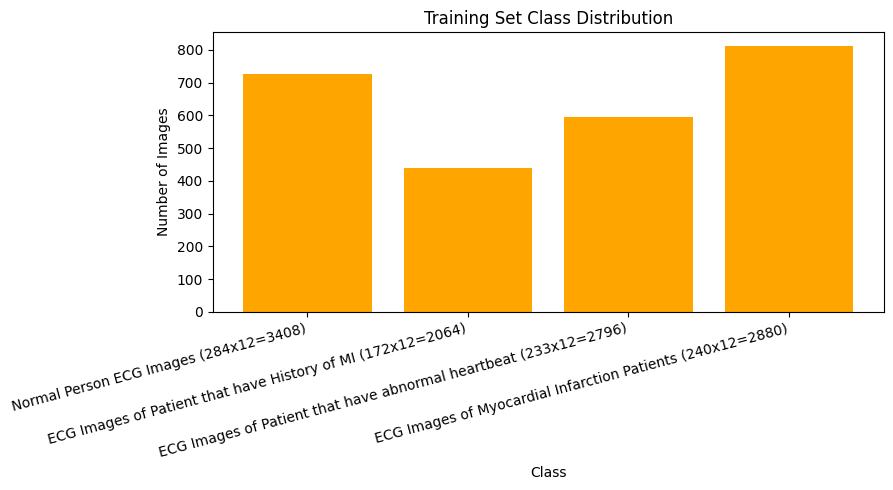

In [4]:
import os
import matplotlib.pyplot as plt
from pathlib import Path

# Set your train folder path
train_path = Path("/kaggle/working/ECG_DATA/train")

# Count images in each class
class_counts = {cls.name: len(list(cls.glob("*"))) for cls in train_path.iterdir() if cls.is_dir()}

# Plot
plt.figure(figsize=(9, 5))
plt.bar(class_counts.keys(), class_counts.values(), color='orange')
plt.title("Training Set Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

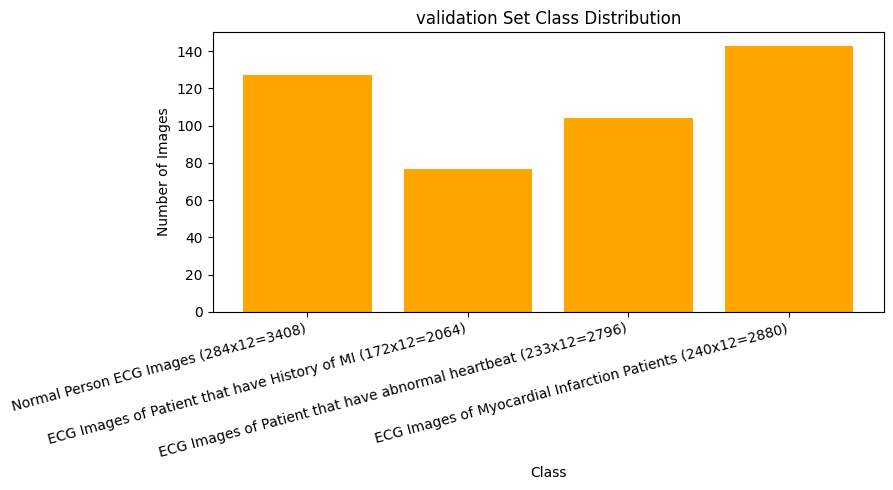

In [5]:
import os
import matplotlib.pyplot as plt
from pathlib import Path

# Set your train folder path
train_path = Path("/kaggle/working/ECG_DATA/val")

# Count images in each class
class_counts = {cls.name: len(list(cls.glob("*"))) for cls in train_path.iterdir() if cls.is_dir()}

# Plot
plt.figure(figsize=(9, 5))
plt.bar(class_counts.keys(), class_counts.values(), color='orange')
plt.title("validation Set Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

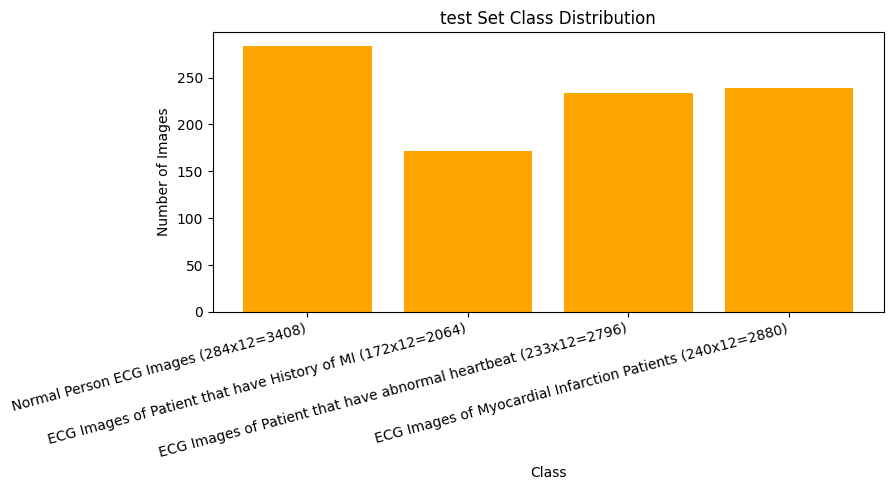

In [6]:
import os
import matplotlib.pyplot as plt
from pathlib import Path

# Set your train folder path
train_path = Path("/kaggle/working/ECG_DATA/test")

# Count images in each class
class_counts = {cls.name: len(list(cls.glob("*"))) for cls in train_path.iterdir() if cls.is_dir()}

# Plot
plt.figure(figsize=(9, 5))
plt.bar(class_counts.keys(), class_counts.values(), color='orange')
plt.title("test Set Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

In [7]:
from torchvision import transforms

# ✅ Augmentation pipeline for training set
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),               # simulate zoom
    transforms.RandomRotation(10),                   # slight tilt
    transforms.ColorJitter(brightness=0.1, contrast=0.1),  # optional: ECG brightness/contrast
    transforms.ToTensor(),                           # convert to tensor
    transforms.Normalize([0.485, 0.456, 0.406],       # ImageNet mean
                         [0.229, 0.224, 0.225])       # ImageNet std
])

# ✅ Simpler transform for validation and test sets (no augmentation)
val_test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

In [8]:
from torchvision import datasets

train_dataset = datasets.ImageFolder('/kaggle/working/ECG_DATA/train', transform=train_transforms)
val_dataset = datasets.ImageFolder('/kaggle/working/ECG_DATA/val', transform=val_test_transforms)
test_dataset = datasets.ImageFolder('/kaggle/working/ECG_DATA/test', transform=val_test_transforms)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from torchvision.utils import make_grid

# Helper function to reverse normalization for display
def imshow(img_tensor, title=None):
    img = img_tensor.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std  = np.array([0.229, 0.224, 0.225])
    img = std * img + mean
    img = np.clip(img, 0, 1)
    plt.imshow(img)
    if title: plt.title(title)
    plt.axis('off')
    plt.show()

# Load one batch with augmentation applied
from torch.utils.data import DataLoader

train_loader_vis = DataLoader(train_dataset, batch_size=8, shuffle=True)

# Get a single batch
images, labels = next(iter(train_loader_vis))
class_names = train_dataset.classes

# Show the grid of images
grid = make_grid(images, nrow=4, pad_value=1)
imshow(grid, title=[class_names[l] for l in labels])

# Resnet50

In [16]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score
)

In [11]:
from torchvision.models import resnet50, ResNet50_Weights
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets
from torch.utils.data import DataLoader
from tqdm import tqdm

In [12]:
# ------------------ Model Setup ------------------
# weights = ResNet50_Weights.DEFAULT
weights = None  # ← Avoids download attempt if offline
model = resnet50(weights=weights)

# Custom classifier head
model.fc = nn.Sequential(
    nn.Linear(2048, 256),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(256, 4)
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [13]:
# ------------------ Loss, Optimizer, Scheduler ------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

In [14]:
# ------------------ Data Setup ------------------
train_path = "/kaggle/working/ECG_DATA/train"
val_path   = "/kaggle/working/ECG_DATA/val"
test_path  = "/kaggle/working/ECG_DATA/test"

train_dataset = datasets.ImageFolder(train_path, transform=train_transforms)
val_dataset   = datasets.ImageFolder(val_path, transform=val_test_transforms)
test_dataset  = datasets.ImageFolder(test_path, transform=val_test_transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

In [15]:
# ------------------ Training Loop with Early Stopping ------------------
epochs = 50
patience = 7
best_val_loss = float('inf')
early_stop_counter = 0

train_loss_history, val_loss_history = [], []
train_acc_history, val_acc_history = [], []

for epoch in range(epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    loop = tqdm(train_loader, desc=f"Epoch [{epoch+1}/{epochs}]", leave=False)
    for inputs, labels in loop:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

        loop.set_postfix(loss=loss.item(), acc=100. * correct / total)

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = correct / total
    train_loss_history.append(epoch_loss)
    train_acc_history.append(epoch_acc)

    # ------------------ Validation ------------------
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    val_loss /= len(val_loader.dataset)
    val_acc = val_correct / val_total
    val_loss_history.append(val_loss)
    val_acc_history.append(val_acc)

    scheduler.step()

    print(f"Epoch {epoch+1}/{epochs} | Train Acc: {epoch_acc:.4f} | Val Acc: {val_acc:.4f} | Val Loss: {val_loss:.4f}")

    # ------------------ Early Stopping Check ------------------
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stop_counter = 0
        torch.save(model.state_dict(), "/kaggle/working/best_model.pth")
        print("✅ Model improved and saved.")
    else:
        early_stop_counter += 1
        print(f"⏳ No improvement in val_loss for {early_stop_counter} epoch(s).")

        if early_stop_counter >= patience:
            print("⛔ Early stopping triggered.")
            break

Epoch 1/50 | Train Acc: 0.3029 | Val Acc: 0.2816 | Val Loss: 1.4276
✅ Model improved and saved.


Epoch 2/50 | Train Acc: 0.3659 | Val Acc: 0.4545 | Val Loss: 1.1763
✅ Model improved and saved.


Epoch 3/50 | Train Acc: 0.3962 | Val Acc: 0.3370 | Val Loss: 1.4863
⏳ No improvement in val_loss for 1 epoch(s).


Epoch 4/50 | Train Acc: 0.4086 | Val Acc: 0.4302 | Val Loss: 1.1234
✅ Model improved and saved.


Epoch 5/50 | Train Acc: 0.4292 | Val Acc: 0.4545 | Val Loss: 1.1719
⏳ No improvement in val_loss for 1 epoch(s).


Epoch 6/50 | Train Acc: 0.4467 | Val Acc: 0.4723 | Val Loss: 1.1219
✅ Model improved and saved.


Epoch 7/50 | Train Acc: 0.4592 | Val Acc: 0.5122 | Val Loss: 1.0770
✅ Model improved and saved.


Epoch 8/50 | Train Acc: 0.4716 | Val Acc: 0.5233 | Val Loss: 1.0432
✅ Model improved and saved.


Epoch 9/50 | Train Acc: 0.4841 | Val Acc: 0.5477 | Val Loss: 1.0368
✅ Model improved and saved.


Epoch 10/50 | Train Acc: 0.4914 | Val Acc: 0.5588 | Val Loss: 1.0002
✅ Model improved and saved.


Epoch 11/50 | Train Acc: 0.4969 | Val Acc: 0.5809 | Val Loss: 0.9926
✅ Model improved and saved.


Epoch 12/50 | Train Acc: 0.5101 | Val Acc: 0.4678 | Val Loss: 1.1059
⏳ No improvement in val_loss for 1 epoch(s).


Epoch 13/50 | Train Acc: 0.5124 | Val Acc: 0.5277 | Val Loss: 1.0045
⏳ No improvement in val_loss for 2 epoch(s).


Epoch 14/50 | Train Acc: 0.5156 | Val Acc: 0.5610 | Val Loss: 0.9990
⏳ No improvement in val_loss for 3 epoch(s).


Epoch 15/50 | Train Acc: 0.5474 | Val Acc: 0.5543 | Val Loss: 0.9761
✅ Model improved and saved.


Epoch 16/50 | Train Acc: 0.5467 | Val Acc: 0.5920 | Val Loss: 0.9502
✅ Model improved and saved.


Epoch 17/50 | Train Acc: 0.5653 | Val Acc: 0.6275 | Val Loss: 0.9149
✅ Model improved and saved.


Epoch 18/50 | Train Acc: 0.5684 | Val Acc: 0.6186 | Val Loss: 0.8684
✅ Model improved and saved.


Epoch 19/50 | Train Acc: 0.5583 | Val Acc: 0.6452 | Val Loss: 0.8453
✅ Model improved and saved.


Epoch 20/50 | Train Acc: 0.5715 | Val Acc: 0.6275 | Val Loss: 0.8490
⏳ No improvement in val_loss for 1 epoch(s).


Epoch 21/50 | Train Acc: 0.5883 | Val Acc: 0.6452 | Val Loss: 0.8337
✅ Model improved and saved.


Epoch 22/50 | Train Acc: 0.5949 | Val Acc: 0.6630 | Val Loss: 0.8201
✅ Model improved and saved.


Epoch 23/50 | Train Acc: 0.5774 | Val Acc: 0.6563 | Val Loss: 0.8497
⏳ No improvement in val_loss for 1 epoch(s).


Epoch 24/50 | Train Acc: 0.6081 | Val Acc: 0.6718 | Val Loss: 0.8173
✅ Model improved and saved.


Epoch 25/50 | Train Acc: 0.5976 | Val Acc: 0.6519 | Val Loss: 0.8376
⏳ No improvement in val_loss for 1 epoch(s).


Epoch 26/50 | Train Acc: 0.6100 | Val Acc: 0.6807 | Val Loss: 0.7974
✅ Model improved and saved.


Epoch 27/50 | Train Acc: 0.6093 | Val Acc: 0.6430 | Val Loss: 0.8202
⏳ No improvement in val_loss for 1 epoch(s).


Epoch 28/50 | Train Acc: 0.6038 | Val Acc: 0.6164 | Val Loss: 0.8479
⏳ No improvement in val_loss for 2 epoch(s).


Epoch 29/50 | Train Acc: 0.5988 | Val Acc: 0.6519 | Val Loss: 0.8256
⏳ No improvement in val_loss for 3 epoch(s).


Epoch 30/50 | Train Acc: 0.6023 | Val Acc: 0.6430 | Val Loss: 0.7928
✅ Model improved and saved.


Epoch 31/50 | Train Acc: 0.6019 | Val Acc: 0.6519 | Val Loss: 0.8013
⏳ No improvement in val_loss for 1 epoch(s).


Epoch 32/50 | Train Acc: 0.6042 | Val Acc: 0.6452 | Val Loss: 0.8036
⏳ No improvement in val_loss for 2 epoch(s).


Epoch 33/50 | Train Acc: 0.6073 | Val Acc: 0.6541 | Val Loss: 0.8080
⏳ No improvement in val_loss for 3 epoch(s).


Epoch 34/50 | Train Acc: 0.6007 | Val Acc: 0.6652 | Val Loss: 0.7930
⏳ No improvement in val_loss for 4 epoch(s).


Epoch 35/50 | Train Acc: 0.6108 | Val Acc: 0.6741 | Val Loss: 0.8170
⏳ No improvement in val_loss for 5 epoch(s).


Epoch 36/50 | Train Acc: 0.6236 | Val Acc: 0.6585 | Val Loss: 0.7812
✅ Model improved and saved.


Epoch 37/50 | Train Acc: 0.6135 | Val Acc: 0.6452 | Val Loss: 0.8136
⏳ No improvement in val_loss for 1 epoch(s).


Epoch 38/50 | Train Acc: 0.6046 | Val Acc: 0.6519 | Val Loss: 0.7994
⏳ No improvement in val_loss for 2 epoch(s).


Epoch 39/50 | Train Acc: 0.6174 | Val Acc: 0.6630 | Val Loss: 0.7737
✅ Model improved and saved.


Epoch 40/50 | Train Acc: 0.6287 | Val Acc: 0.6585 | Val Loss: 0.7897
⏳ No improvement in val_loss for 1 epoch(s).


Epoch 41/50 | Train Acc: 0.6147 | Val Acc: 0.6630 | Val Loss: 0.7927
⏳ No improvement in val_loss for 2 epoch(s).


Epoch 42/50 | Train Acc: 0.6151 | Val Acc: 0.6452 | Val Loss: 0.8135
⏳ No improvement in val_loss for 3 epoch(s).


Epoch 43/50 | Train Acc: 0.6100 | Val Acc: 0.6519 | Val Loss: 0.7967
⏳ No improvement in val_loss for 4 epoch(s).


Epoch 44/50 | Train Acc: 0.6178 | Val Acc: 0.6541 | Val Loss: 0.7961
⏳ No improvement in val_loss for 5 epoch(s).


Epoch 45/50 | Train Acc: 0.6267 | Val Acc: 0.6408 | Val Loss: 0.8174
⏳ No improvement in val_loss for 6 epoch(s).


Epoch 46/50 | Train Acc: 0.6260 | Val Acc: 0.6918 | Val Loss: 0.7753
⏳ No improvement in val_loss for 7 epoch(s).
⛔ Early stopping triggered.


In [17]:
import torch
import numpy as np

# Evaluate on test set
model.eval()
all_preds, all_labels = [], []
test_loss = 0.0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * inputs.size(0)

        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute average test loss
test_loss /= len(test_loader.dataset)

# Convert to numpy arrays
y_true = np.array(all_labels)
y_pred = np.array(all_preds)

# Print Metrics
print("✅ Test Loss:", test_loss)
print("✅ Test Accuracy:", accuracy_score(y_true, y_pred))
print("✅ Precision (macro):", precision_score(y_true, y_pred, average='macro'))
print("✅ Recall (macro):", recall_score(y_true, y_pred, average='macro'))
print("✅ F1 Score (macro):", f1_score(y_true, y_pred, average='macro'))
print("✅ F1 Score (weighted):", f1_score(y_true, y_pred, average='weighted'))

# Classification Report
print("\n📋 Classification Report:\n", classification_report(y_true, y_pred, target_names=test_dataset.classes))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

✅ Test Loss: 0.7972428284842392
✅ Test Accuracy: 0.6810344827586207
✅ Precision (macro): 0.6526911067075002
✅ Recall (macro): 0.6415427305186561
✅ F1 Score (macro): 0.6276905098138775
✅ F1 Score (weighted): 0.6596085599154551

📋 Classification Report:
                                                                   precision    recall  f1-score   support

      ECG Images of Myocardial Infarction Patients (240x12=2880)       0.59      0.87      0.70       239
     ECG Images of Patient that have History of MI (172x12=2064)       0.44      0.20      0.27       172
ECG Images of Patient that have abnormal heartbeat (233x12=2796)       0.84      0.70      0.76       233
                          Normal Person ECG Images (284x12=3408)       0.75      0.80      0.77       284

                                                        accuracy                           0.68       928
                                                       macro avg       0.65      0.64      0.63       928
   

/tmp/ipykernel_35/1658361587.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


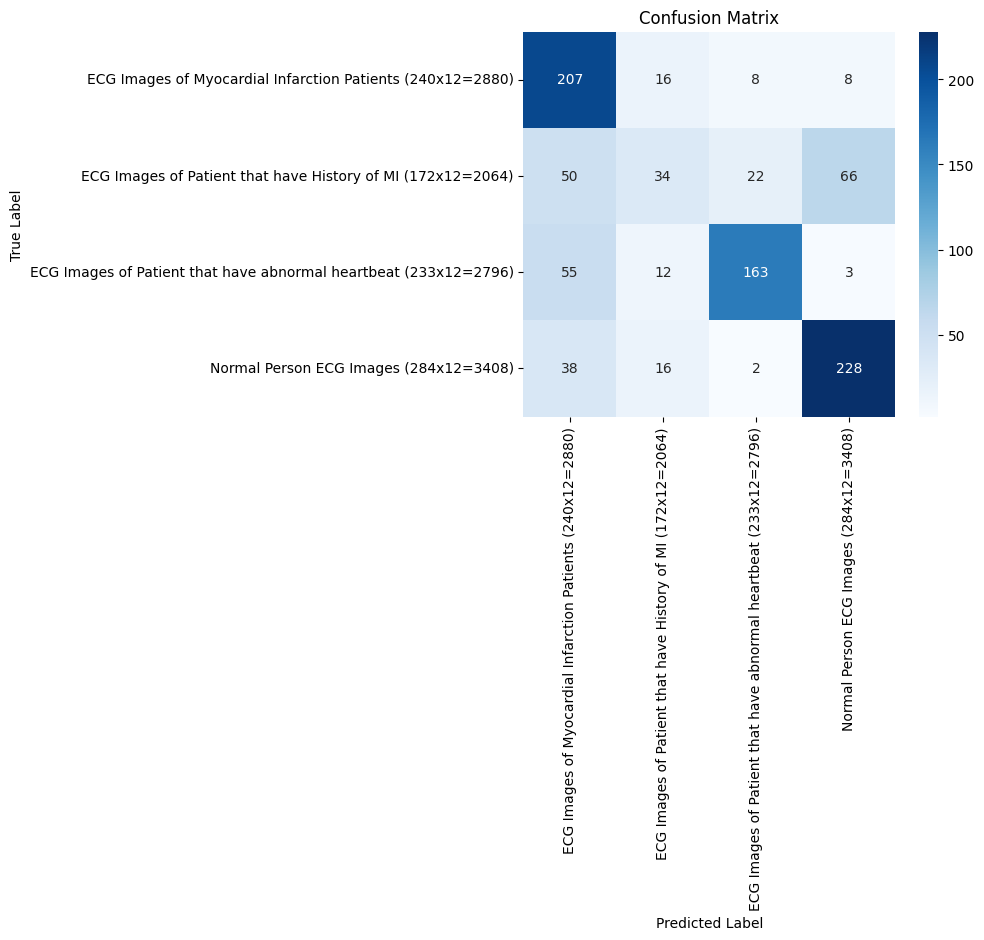

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_dataset.classes,
            yticklabels=test_dataset.classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

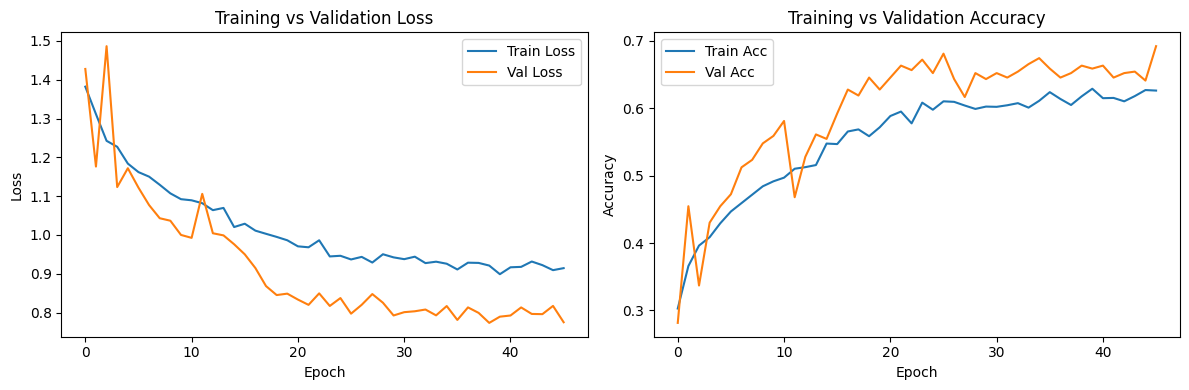

In [19]:
plt.figure(figsize=(12, 4))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label='Train Loss')
plt.plot(val_loss_history, label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(train_acc_history, label='Train Acc')
plt.plot(val_acc_history, label='Val Acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

# MobilenetV2

In [21]:
from torchvision.models import mobilenet_v2
import torch.nn as nn

# Load MobileNetV2 with optional pretrained weights
model = mobilenet_v2(weights=None)  # Use weights='DEFAULT' if internet access allowed

# Replace the classifier head
model.classifier = nn.Sequential(
    nn.Dropout(0.4),
    nn.Linear(model.last_channel, 4)  # 4-class output
)

model = model.to(device)

In [22]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)


In [23]:
train_dataset = datasets.ImageFolder(train_path, transform=train_transforms)
val_dataset   = datasets.ImageFolder(val_path, transform=val_test_transforms)
test_dataset  = datasets.ImageFolder(test_path, transform=val_test_transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

In [24]:
# ------------------ Training Loop with Early Stopping ------------------
epochs = 50
patience = 7
best_val_loss = float('inf')
early_stop_counter = 0

train_loss_history, val_loss_history = [], []
train_acc_history, val_acc_history = [], []

for epoch in range(epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    loop = tqdm(train_loader, desc=f"Epoch [{epoch+1}/{epochs}]", leave=False)
    for inputs, labels in loop:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

        loop.set_postfix(loss=loss.item(), acc=100. * correct / total)

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = correct / total
    train_loss_history.append(epoch_loss)
    train_acc_history.append(epoch_acc)

    # ------------------ Validation ------------------
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    val_loss /= len(val_loader.dataset)
    val_acc = val_correct / val_total
    val_loss_history.append(val_loss)
    val_acc_history.append(val_acc)

    scheduler.step()

    print(f"Epoch {epoch+1}/{epochs} | Train Acc: {epoch_acc:.4f} | Val Acc: {val_acc:.4f} | Val Loss: {val_loss:.4f}")

    # ------------------ Early Stopping ------------------
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stop_counter = 0
        torch.save(model.state_dict(), "/kaggle/working/mobilenet_best.pth")
        print("✅ Model improved and saved.")
    else:
        early_stop_counter += 1
        print(f"⏳ No improvement in val_loss for {early_stop_counter} epoch(s).")

        if early_stop_counter >= patience:
            print("⛔ Early stopping triggered.")
            break

Epoch 1/50 | Train Acc: 0.3060 | Val Acc: 0.2816 | Val Loss: 1.4845
✅ Model improved and saved.


Epoch 2/50 | Train Acc: 0.3301 | Val Acc: 0.3459 | Val Loss: 1.3332
✅ Model improved and saved.


Epoch 3/50 | Train Acc: 0.3717 | Val Acc: 0.3592 | Val Loss: 1.3076
✅ Model improved and saved.


Epoch 4/50 | Train Acc: 0.3663 | Val Acc: 0.3104 | Val Loss: 1.3516
⏳ No improvement in val_loss for 1 epoch(s).


Epoch 5/50 | Train Acc: 0.3779 | Val Acc: 0.3326 | Val Loss: 1.3050
✅ Model improved and saved.


Epoch 6/50 | Train Acc: 0.3884 | Val Acc: 0.3836 | Val Loss: 1.2852
✅ Model improved and saved.


Epoch 7/50 | Train Acc: 0.4082 | Val Acc: 0.3659 | Val Loss: 1.2728
✅ Model improved and saved.


Epoch 8/50 | Train Acc: 0.4234 | Val Acc: 0.4146 | Val Loss: 1.2358
✅ Model improved and saved.


Epoch 9/50 | Train Acc: 0.4184 | Val Acc: 0.3725 | Val Loss: 1.3097
⏳ No improvement in val_loss for 1 epoch(s).


Epoch 10/50 | Train Acc: 0.4277 | Val Acc: 0.4435 | Val Loss: 1.2303
✅ Model improved and saved.


Epoch 11/50 | Train Acc: 0.4253 | Val Acc: 0.4235 | Val Loss: 1.2152
✅ Model improved and saved.


Epoch 12/50 | Train Acc: 0.4257 | Val Acc: 0.4545 | Val Loss: 1.1888
✅ Model improved and saved.


Epoch 13/50 | Train Acc: 0.4238 | Val Acc: 0.4812 | Val Loss: 1.1799
✅ Model improved and saved.


Epoch 14/50 | Train Acc: 0.4168 | Val Acc: 0.5078 | Val Loss: 1.1599
✅ Model improved and saved.


Epoch 15/50 | Train Acc: 0.4250 | Val Acc: 0.4235 | Val Loss: 1.1906
⏳ No improvement in val_loss for 1 epoch(s).


Epoch 16/50 | Train Acc: 0.4401 | Val Acc: 0.4545 | Val Loss: 1.1591
✅ Model improved and saved.


Epoch 17/50 | Train Acc: 0.4421 | Val Acc: 0.4701 | Val Loss: 1.1720
⏳ No improvement in val_loss for 1 epoch(s).


Epoch 18/50 | Train Acc: 0.4479 | Val Acc: 0.4967 | Val Loss: 1.1610
⏳ No improvement in val_loss for 2 epoch(s).


Epoch 19/50 | Train Acc: 0.4452 | Val Acc: 0.4723 | Val Loss: 1.1539
✅ Model improved and saved.


Epoch 20/50 | Train Acc: 0.4463 | Val Acc: 0.4834 | Val Loss: 1.1440
✅ Model improved and saved.


Epoch 21/50 | Train Acc: 0.4331 | Val Acc: 0.4878 | Val Loss: 1.1359
✅ Model improved and saved.


Epoch 22/50 | Train Acc: 0.4421 | Val Acc: 0.4612 | Val Loss: 1.1467
⏳ No improvement in val_loss for 1 epoch(s).


Epoch 23/50 | Train Acc: 0.4320 | Val Acc: 0.4812 | Val Loss: 1.1438
⏳ No improvement in val_loss for 2 epoch(s).


Epoch 24/50 | Train Acc: 0.4358 | Val Acc: 0.4767 | Val Loss: 1.1507
⏳ No improvement in val_loss for 3 epoch(s).


Epoch 25/50 | Train Acc: 0.4370 | Val Acc: 0.4412 | Val Loss: 1.1586
⏳ No improvement in val_loss for 4 epoch(s).


Epoch 26/50 | Train Acc: 0.4584 | Val Acc: 0.4612 | Val Loss: 1.1664
⏳ No improvement in val_loss for 5 epoch(s).


Epoch 27/50 | Train Acc: 0.4355 | Val Acc: 0.4479 | Val Loss: 1.1490
⏳ No improvement in val_loss for 6 epoch(s).


Epoch 28/50 | Train Acc: 0.4370 | Val Acc: 0.4678 | Val Loss: 1.1467
⏳ No improvement in val_loss for 7 epoch(s).
⛔ Early stopping triggered.


In [25]:
import torch
import numpy as np

# Evaluate on test set
model.eval()
all_preds, all_labels = [], []
test_loss = 0.0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * inputs.size(0)

        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute average test loss
test_loss /= len(test_loader.dataset)

# Convert to numpy arrays
y_true = np.array(all_labels)
y_pred = np.array(all_preds)

# Print Metrics
print("✅ Test Loss:", test_loss)
print("✅ Test Accuracy:", accuracy_score(y_true, y_pred))
print("✅ Precision (macro):", precision_score(y_true, y_pred, average='macro'))
print("✅ Recall (macro):", recall_score(y_true, y_pred, average='macro'))
print("✅ F1 Score (macro):", f1_score(y_true, y_pred, average='macro'))
print("✅ F1 Score (weighted):", f1_score(y_true, y_pred, average='weighted'))

# Classification Report
print("\n📋 Classification Report:\n", classification_report(y_true, y_pred, target_names=test_dataset.classes))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

✅ Test Loss: 1.1580720461648086
✅ Test Accuracy: 0.47737068965517243
✅ Precision (macro): 0.3948252730597347
✅ Recall (macro): 0.42615314419604344
✅ F1 Score (macro): 0.38618360441889854
✅ F1 Score (weighted): 0.42172982918165475

📋 Classification Report:
                                                                   precision    recall  f1-score   support

      ECG Images of Myocardial Infarction Patients (240x12=2880)       0.39      0.33      0.36       239
     ECG Images of Patient that have History of MI (172x12=2064)       0.00      0.00      0.00       172
ECG Images of Patient that have abnormal heartbeat (233x12=2796)       0.76      0.51      0.61       233
                          Normal Person ECG Images (284x12=3408)       0.43      0.86      0.57       284

                                                        accuracy                           0.48       928
                                                       macro avg       0.39      0.43      0.39       928

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:13

/tmp/ipykernel_35/3080244195.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


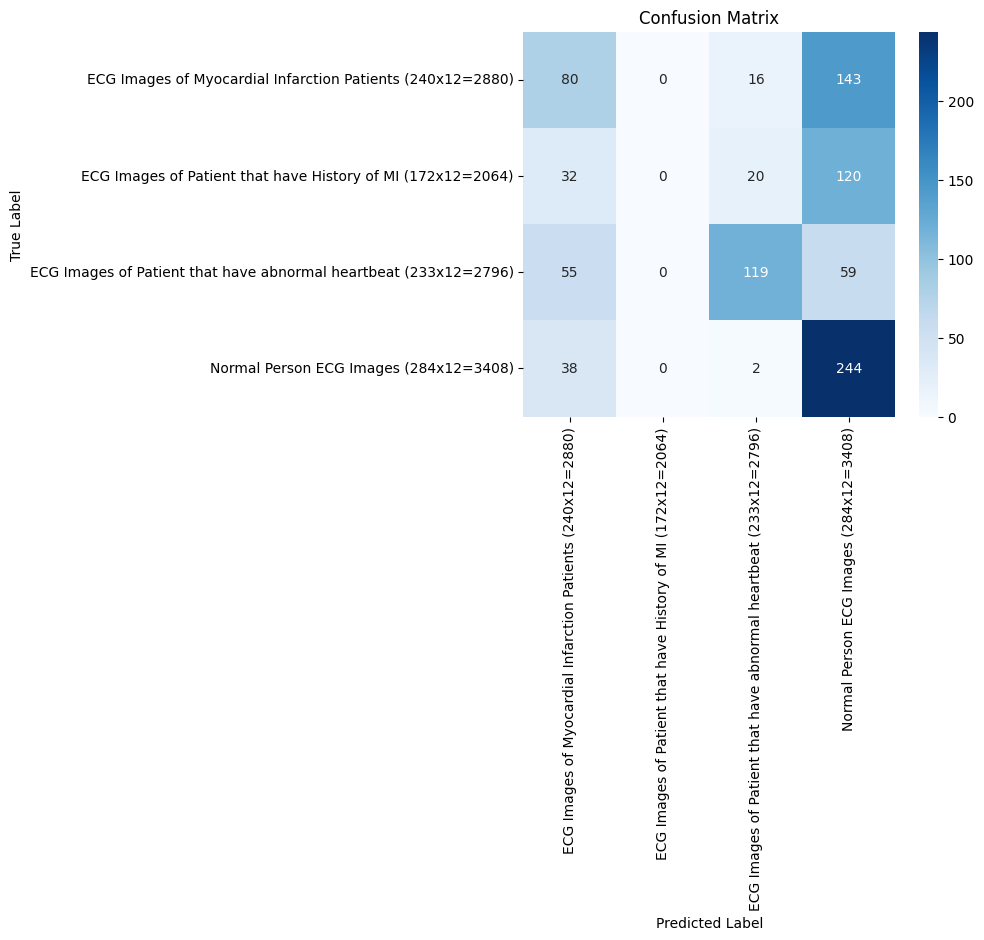

In [26]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_dataset.classes,
            yticklabels=test_dataset.classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

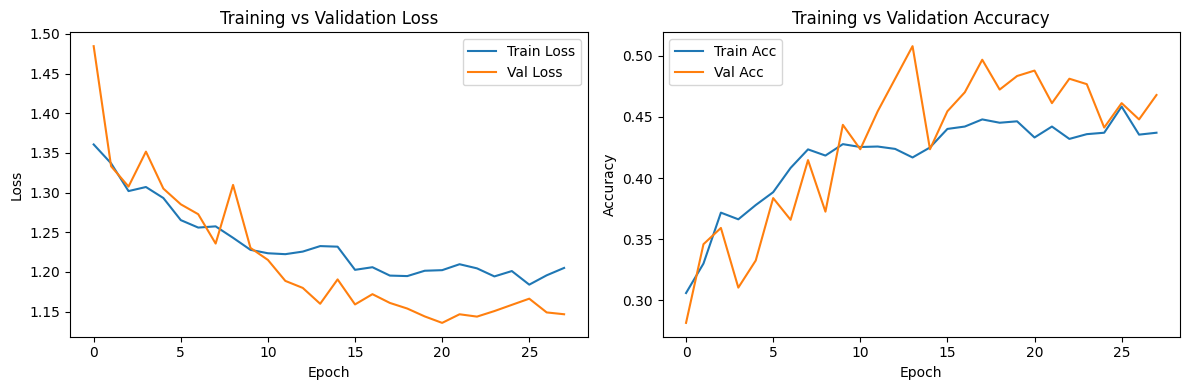

In [27]:
plt.figure(figsize=(12, 4))
# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label='Train Loss')
plt.plot(val_loss_history, label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(train_acc_history, label='Train Acc')
plt.plot(val_acc_history, label='Val Acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

# DenseNet121 

In [29]:
from torchvision.models import densenet121
from torchvision import datasets
from torch.utils.data import DataLoader
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim
import torch

# ------------------ Model Setup ------------------
model = densenet121(weights=None)  # use weights='DEFAULT' if online

# Replace classifier for 4-class output
model.classifier = nn.Sequential(
    nn.Linear(model.classifier.in_features, 256),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(256, 4)
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# ------------------ Optimizer / Loss / Scheduler ------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

# ------------------ Data Setup ------------------
train_path = "/kaggle/working/ECG_DATA/train"
val_path   = "/kaggle/working/ECG_DATA/val"
test_path  = "/kaggle/working/ECG_DATA/test"

train_dataset = datasets.ImageFolder(train_path, transform=train_transforms)
val_dataset   = datasets.ImageFolder(val_path, transform=val_test_transforms)
test_dataset  = datasets.ImageFolder(test_path, transform=val_test_transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

In [30]:
# ------------------ Training Loop with Early Stopping ------------------
epochs = 50
patience = 7
best_val_loss = float('inf')
early_stop_counter = 0

train_loss_history, val_loss_history = [], []
train_acc_history, val_acc_history = [], []

for epoch in range(epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    loop = tqdm(train_loader, desc=f"Epoch [{epoch+1}/{epochs}]", leave=False)
    for inputs, labels in loop:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

        loop.set_postfix(loss=loss.item(), acc=100. * correct / total)

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = correct / total
    train_loss_history.append(epoch_loss)
    train_acc_history.append(epoch_acc)

    # ------------------ Validation ------------------
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    val_loss /= len(val_loader.dataset)
    val_acc = val_correct / val_total
    val_loss_history.append(val_loss)
    val_acc_history.append(val_acc)

    scheduler.step()

    print(f"Epoch {epoch+1}/{epochs} | Train Acc: {epoch_acc:.4f} | Val Acc: {val_acc:.4f} | Val Loss: {val_loss:.4f}")

    # ------------------ Early Stopping ------------------
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stop_counter = 0
        torch.save(model.state_dict(), "/kaggle/working/densenet_best.pth")
        print("✅ Model improved and saved.")
    else:
        early_stop_counter += 1
        print(f"⏳ No improvement in val_loss for {early_stop_counter} epoch(s).")

        if early_stop_counter >= patience:
            print("⛔ Early stopping triggered.")
            break

Epoch 1/50 | Train Acc: 0.3542 | Val Acc: 0.5211 | Val Loss: 1.1202
✅ Model improved and saved.


Epoch 2/50 | Train Acc: 0.4226 | Val Acc: 0.4878 | Val Loss: 1.1597
⏳ No improvement in val_loss for 1 epoch(s).


Epoch 3/50 | Train Acc: 0.5435 | Val Acc: 0.3459 | Val Loss: 2.3400
⏳ No improvement in val_loss for 2 epoch(s).


Epoch 4/50 | Train Acc: 0.6454 | Val Acc: 0.6585 | Val Loss: 0.8840
✅ Model improved and saved.


Epoch 5/50 | Train Acc: 0.7181 | Val Acc: 0.8492 | Val Loss: 0.4827
✅ Model improved and saved.


Epoch 6/50 | Train Acc: 0.7714 | Val Acc: 0.8803 | Val Loss: 0.4356
✅ Model improved and saved.


Epoch 7/50 | Train Acc: 0.7795 | Val Acc: 0.8204 | Val Loss: 0.4670
⏳ No improvement in val_loss for 1 epoch(s).


Epoch 8/50 | Train Acc: 0.7974 | Val Acc: 0.8980 | Val Loss: 0.3145
✅ Model improved and saved.


Epoch 9/50 | Train Acc: 0.8250 | Val Acc: 0.8803 | Val Loss: 0.3527
⏳ No improvement in val_loss for 1 epoch(s).


Epoch 10/50 | Train Acc: 0.8363 | Val Acc: 0.9091 | Val Loss: 0.2698
✅ Model improved and saved.


Epoch 11/50 | Train Acc: 0.8375 | Val Acc: 0.8936 | Val Loss: 0.2984
⏳ No improvement in val_loss for 1 epoch(s).


Epoch 12/50 | Train Acc: 0.8561 | Val Acc: 0.8492 | Val Loss: 0.4387
⏳ No improvement in val_loss for 2 epoch(s).


Epoch 13/50 | Train Acc: 0.8437 | Val Acc: 0.8825 | Val Loss: 0.2826
⏳ No improvement in val_loss for 3 epoch(s).


Epoch 14/50 | Train Acc: 0.8663 | Val Acc: 0.9091 | Val Loss: 0.2525
✅ Model improved and saved.


Epoch 15/50 | Train Acc: 0.8577 | Val Acc: 0.9424 | Val Loss: 0.2125
✅ Model improved and saved.


Epoch 16/50 | Train Acc: 0.8690 | Val Acc: 0.9113 | Val Loss: 0.2648
⏳ No improvement in val_loss for 1 epoch(s).


Epoch 17/50 | Train Acc: 0.8736 | Val Acc: 0.9268 | Val Loss: 0.2339
⏳ No improvement in val_loss for 2 epoch(s).


Epoch 18/50 | Train Acc: 0.8635 | Val Acc: 0.9268 | Val Loss: 0.2673
⏳ No improvement in val_loss for 3 epoch(s).


Epoch 19/50 | Train Acc: 0.8686 | Val Acc: 0.8936 | Val Loss: 0.3431
⏳ No improvement in val_loss for 4 epoch(s).


Epoch 20/50 | Train Acc: 0.8620 | Val Acc: 0.9268 | Val Loss: 0.2264
⏳ No improvement in val_loss for 5 epoch(s).


Epoch 21/50 | Train Acc: 0.8760 | Val Acc: 0.9202 | Val Loss: 0.2318
⏳ No improvement in val_loss for 6 epoch(s).


Epoch 22/50 | Train Acc: 0.8783 | Val Acc: 0.9424 | Val Loss: 0.2114
✅ Model improved and saved.


Epoch 23/50 | Train Acc: 0.8709 | Val Acc: 0.9401 | Val Loss: 0.2065
✅ Model improved and saved.


Epoch 24/50 | Train Acc: 0.8907 | Val Acc: 0.9135 | Val Loss: 0.2425
⏳ No improvement in val_loss for 1 epoch(s).


Epoch 25/50 | Train Acc: 0.8779 | Val Acc: 0.9246 | Val Loss: 0.2543
⏳ No improvement in val_loss for 2 epoch(s).


Epoch 26/50 | Train Acc: 0.8733 | Val Acc: 0.9468 | Val Loss: 0.2333
⏳ No improvement in val_loss for 3 epoch(s).


Epoch 27/50 | Train Acc: 0.8767 | Val Acc: 0.9180 | Val Loss: 0.2283
⏳ No improvement in val_loss for 4 epoch(s).


Epoch 28/50 | Train Acc: 0.8666 | Val Acc: 0.9534 | Val Loss: 0.2146
⏳ No improvement in val_loss for 5 epoch(s).


Epoch 29/50 | Train Acc: 0.8721 | Val Acc: 0.9512 | Val Loss: 0.1949
✅ Model improved and saved.


Epoch 30/50 | Train Acc: 0.8682 | Val Acc: 0.9490 | Val Loss: 0.1947
✅ Model improved and saved.


Epoch 31/50 | Train Acc: 0.8853 | Val Acc: 0.9446 | Val Loss: 0.2227
⏳ No improvement in val_loss for 1 epoch(s).


Epoch 32/50 | Train Acc: 0.8744 | Val Acc: 0.9490 | Val Loss: 0.2088
⏳ No improvement in val_loss for 2 epoch(s).


Epoch 33/50 | Train Acc: 0.8869 | Val Acc: 0.9468 | Val Loss: 0.2063
⏳ No improvement in val_loss for 3 epoch(s).


Epoch 34/50 | Train Acc: 0.8841 | Val Acc: 0.9357 | Val Loss: 0.2181
⏳ No improvement in val_loss for 4 epoch(s).


Epoch 35/50 | Train Acc: 0.8865 | Val Acc: 0.9424 | Val Loss: 0.2102
⏳ No improvement in val_loss for 5 epoch(s).


Epoch 36/50 | Train Acc: 0.8795 | Val Acc: 0.9224 | Val Loss: 0.2279
⏳ No improvement in val_loss for 6 epoch(s).


Epoch 37/50 | Train Acc: 0.8810 | Val Acc: 0.9224 | Val Loss: 0.2190
⏳ No improvement in val_loss for 7 epoch(s).
⛔ Early stopping triggered.


In [31]:
import torch
import numpy as np

# Evaluate on test set
model.eval()
all_preds, all_labels = [], []
test_loss = 0.0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * inputs.size(0)

        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute average test loss
test_loss /= len(test_loader.dataset)

# Convert to numpy arrays
y_true = np.array(all_labels)
y_pred = np.array(all_preds)

# Print Metrics
print("✅ Test Loss:", test_loss)
print("✅ Test Accuracy:", accuracy_score(y_true, y_pred))
print("✅ Precision (macro):", precision_score(y_true, y_pred, average='macro'))
print("✅ Recall (macro):", recall_score(y_true, y_pred, average='macro'))
print("✅ F1 Score (macro):", f1_score(y_true, y_pred, average='macro'))
print("✅ F1 Score (weighted):", f1_score(y_true, y_pred, average='weighted'))

# Classification Report
print("\n📋 Classification Report:\n", classification_report(y_true, y_pred, target_names=test_dataset.classes))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

✅ Test Loss: 0.24711518965918441
✅ Test Accuracy: 0.915948275862069
✅ Precision (macro): 0.9103785588500903
✅ Recall (macro): 0.9158670583761087
✅ F1 Score (macro): 0.9107148863877721
✅ F1 Score (weighted): 0.9179858898393192

📋 Classification Report:
                                                                   precision    recall  f1-score   support

      ECG Images of Myocardial Infarction Patients (240x12=2880)       0.99      0.90      0.94       239
     ECG Images of Patient that have History of MI (172x12=2064)       0.77      0.92      0.84       172
ECG Images of Patient that have abnormal heartbeat (233x12=2796)       0.90      0.92      0.91       233
                          Normal Person ECG Images (284x12=3408)       0.98      0.92      0.95       284

                                                        accuracy                           0.92       928
                                                       macro avg       0.91      0.92      0.91       928
   

/tmp/ipykernel_35/3080244195.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


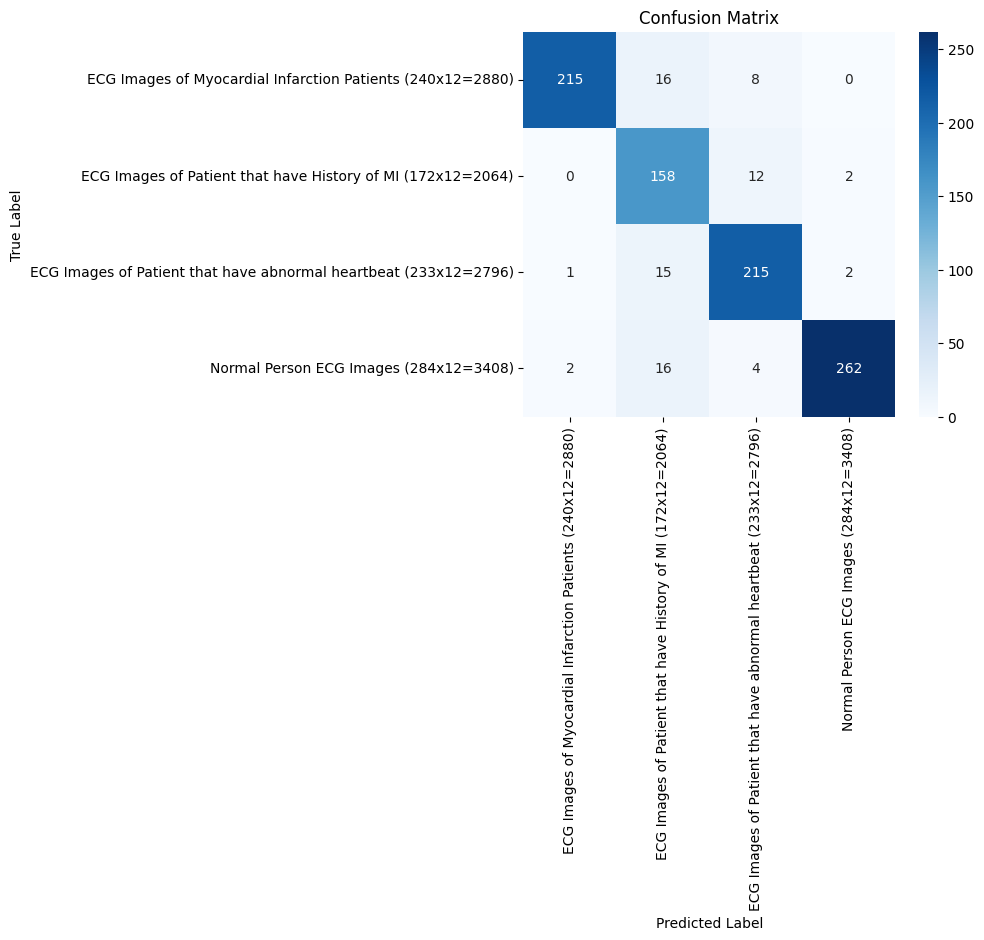

In [32]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_dataset.classes,
            yticklabels=test_dataset.classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

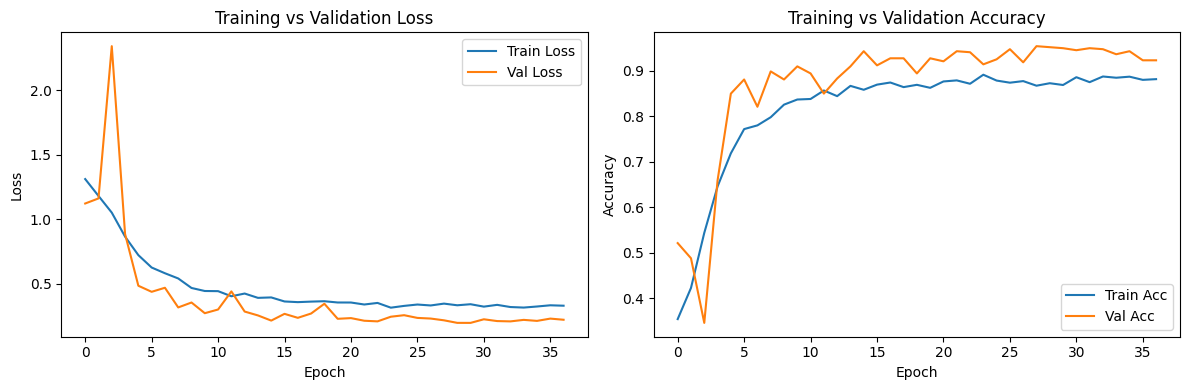

In [33]:
plt.figure(figsize=(12, 4))
# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label='Train Loss')
plt.plot(val_loss_history, label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(train_acc_history, label='Train Acc')
plt.plot(val_acc_history, label='Val Acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

# ConvNeXt-Tiny

In [34]:
from torchvision.models import convnext_tiny, ConvNeXt_Tiny_Weights
import torch.nn as nn
import torch
import torch.optim as optim
from torchvision import datasets
from torch.utils.data import DataLoader
from tqdm import tqdm

In [36]:
# ------------------ Model Setup ------------------
weights = None  # Use None to avoid download issues

model = convnext_tiny(weights=weights)

# Replace the classifier head
model.classifier[2] = nn.Sequential(
    nn.Linear(model.classifier[2].in_features, 256),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(256, 4)
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [37]:
# ------------------ Loss, Optimizer, Scheduler ------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

# ------------------ Data Setup ------------------
train_path = "/kaggle/working/ECG_DATA/train"
val_path   = "/kaggle/working/ECG_DATA/val"
test_path  = "/kaggle/working/ECG_DATA/test"

train_dataset = datasets.ImageFolder(train_path, transform=train_transforms)
val_dataset   = datasets.ImageFolder(val_path, transform=val_test_transforms)
test_dataset  = datasets.ImageFolder(test_path, transform=val_test_transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)
test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

In [39]:
# ------------------ Training Loop with Early Stopping ------------------
epochs = 50
patience = 10
best_val_loss = float('inf')
early_stop_counter = 0

train_loss_history, val_loss_history = [], []
train_acc_history, val_acc_history = [], []

for epoch in range(epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0

    loop = tqdm(train_loader, desc=f"Epoch [{epoch+1}/{epochs}]", leave=False)
    for inputs, labels in loop:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

        loop.set_postfix(loss=loss.item(), acc=100. * correct / total)

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = correct / total
    train_loss_history.append(epoch_loss)
    train_acc_history.append(epoch_acc)

    # ------------------ Validation ------------------
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)

    val_loss /= len(val_loader.dataset)
    val_acc = val_correct / val_total
    val_loss_history.append(val_loss)
    val_acc_history.append(val_acc)

    scheduler.step()

    print(f"Epoch {epoch+1}/{epochs} | Train Acc: {epoch_acc:.4f} | Val Acc: {val_acc:.4f} | Val Loss: {val_loss:.4f}")

    # ------------------ Early Stopping ------------------
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stop_counter = 0
        torch.save(model.state_dict(), "/kaggle/working/convnext_tiny_best.pth")
        print("✅ Model improved and saved.")
    else:
        early_stop_counter += 1
        print(f"⏳ No improvement in val_loss for {early_stop_counter} epoch(s).")

        if early_stop_counter >= patience:
            print("⛔ Early stopping triggered.")
            break

Epoch 1/50 | Train Acc: 0.3215 | Val Acc: 0.3171 | Val Loss: 1.3616
✅ Model improved and saved.


Epoch 2/50 | Train Acc: 0.3161 | Val Acc: 0.3171 | Val Loss: 1.3617
⏳ No improvement in val_loss for 1 epoch(s).


Epoch 3/50 | Train Acc: 0.3142 | Val Acc: 0.3171 | Val Loss: 1.3618
⏳ No improvement in val_loss for 2 epoch(s).


Epoch 4/50 | Train Acc: 0.3196 | Val Acc: 0.3171 | Val Loss: 1.3616
✅ Model improved and saved.


Epoch 5/50 | Train Acc: 0.3114 | Val Acc: 0.3171 | Val Loss: 1.3616
⏳ No improvement in val_loss for 1 epoch(s).


Epoch 6/50 | Train Acc: 0.3126 | Val Acc: 0.3171 | Val Loss: 1.3615
✅ Model improved and saved.


Epoch 7/50 | Train Acc: 0.3142 | Val Acc: 0.3171 | Val Loss: 1.3614
✅ Model improved and saved.


Epoch 8/50 | Train Acc: 0.3118 | Val Acc: 0.3171 | Val Loss: 1.3614
⏳ No improvement in val_loss for 1 epoch(s).


Epoch 9/50 | Train Acc: 0.3040 | Val Acc: 0.3171 | Val Loss: 1.3614
⏳ No improvement in val_loss for 2 epoch(s).


Epoch 10/50 | Train Acc: 0.3083 | Val Acc: 0.3171 | Val Loss: 1.3614
✅ Model improved and saved.


Epoch 11/50 | Train Acc: 0.3091 | Val Acc: 0.3171 | Val Loss: 1.3617
⏳ No improvement in val_loss for 1 epoch(s).


Epoch 12/50 | Train Acc: 0.3138 | Val Acc: 0.3171 | Val Loss: 1.3617
⏳ No improvement in val_loss for 2 epoch(s).


Epoch 13/50 | Train Acc: 0.3149 | Val Acc: 0.3171 | Val Loss: 1.3616
⏳ No improvement in val_loss for 3 epoch(s).


Epoch 14/50 | Train Acc: 0.3145 | Val Acc: 0.3171 | Val Loss: 1.3615
⏳ No improvement in val_loss for 4 epoch(s).


Epoch 15/50 | Train Acc: 0.3177 | Val Acc: 0.3171 | Val Loss: 1.3615
⏳ No improvement in val_loss for 5 epoch(s).


Epoch 16/50 | Train Acc: 0.3192 | Val Acc: 0.3171 | Val Loss: 1.3614
⏳ No improvement in val_loss for 6 epoch(s).


Epoch 17/50 | Train Acc: 0.3180 | Val Acc: 0.3171 | Val Loss: 1.3614
⏳ No improvement in val_loss for 7 epoch(s).


Epoch 18/50 | Train Acc: 0.3169 | Val Acc: 0.3171 | Val Loss: 1.3614
✅ Model improved and saved.


Epoch 19/50 | Train Acc: 0.3130 | Val Acc: 0.3171 | Val Loss: 1.3614
⏳ No improvement in val_loss for 1 epoch(s).


Epoch 20/50 | Train Acc: 0.3161 | Val Acc: 0.3171 | Val Loss: 1.3615
⏳ No improvement in val_loss for 2 epoch(s).


Epoch 21/50 | Train Acc: 0.3099 | Val Acc: 0.3171 | Val Loss: 1.3615
⏳ No improvement in val_loss for 3 epoch(s).


Epoch 22/50 | Train Acc: 0.3099 | Val Acc: 0.3171 | Val Loss: 1.3615
⏳ No improvement in val_loss for 4 epoch(s).


Epoch 23/50 | Train Acc: 0.3107 | Val Acc: 0.3171 | Val Loss: 1.3615
⏳ No improvement in val_loss for 5 epoch(s).


Epoch 24/50 | Train Acc: 0.3091 | Val Acc: 0.3171 | Val Loss: 1.3615
⏳ No improvement in val_loss for 6 epoch(s).


Epoch 25/50 | Train Acc: 0.3188 | Val Acc: 0.3171 | Val Loss: 1.3615
⏳ No improvement in val_loss for 7 epoch(s).


Epoch 26/50 | Train Acc: 0.3165 | Val Acc: 0.3171 | Val Loss: 1.3615
⏳ No improvement in val_loss for 8 epoch(s).


Epoch 27/50 | Train Acc: 0.3161 | Val Acc: 0.3171 | Val Loss: 1.3615
⏳ No improvement in val_loss for 9 epoch(s).


Epoch 28/50 | Train Acc: 0.3142 | Val Acc: 0.3171 | Val Loss: 1.3615
⏳ No improvement in val_loss for 10 epoch(s).
⛔ Early stopping triggered.


In [40]:
import torch
import numpy as np

# Evaluate on test set
model.eval()
all_preds, all_labels = [], []
test_loss = 0.0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * inputs.size(0)

        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute average test loss
test_loss /= len(test_loader.dataset)

# Convert to numpy arrays
y_true = np.array(all_labels)
y_pred = np.array(all_preds)

# Print Metrics
print("✅ Test Loss:", test_loss)
print("✅ Test Accuracy:", accuracy_score(y_true, y_pred))
print("✅ Precision (macro):", precision_score(y_true, y_pred, average='macro'))
print("✅ Recall (macro):", recall_score(y_true, y_pred, average='macro'))
print("✅ F1 Score (macro):", f1_score(y_true, y_pred, average='macro'))
print("✅ F1 Score (weighted):", f1_score(y_true, y_pred, average='weighted'))

# Classification Report
print("\n📋 Classification Report:\n", classification_report(y_true, y_pred, target_names=test_dataset.classes))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

✅ Test Loss: 1.3777305668797986
✅ Test Accuracy: 0.25754310344827586
✅ Precision (macro): 0.06438577586206896
✅ Recall (macro): 0.25
✅ F1 Score (macro): 0.1023993144815767
✅ F1 Score (weighted): 0.10548894897024497

📋 Classification Report:
                                                                   precision    recall  f1-score   support

      ECG Images of Myocardial Infarction Patients (240x12=2880)       0.26      1.00      0.41       239
     ECG Images of Patient that have History of MI (172x12=2064)       0.00      0.00      0.00       172
ECG Images of Patient that have abnormal heartbeat (233x12=2796)       0.00      0.00      0.00       233
                          Normal Person ECG Images (284x12=3408)       0.00      0.00      0.00       284

                                                        accuracy                           0.26       928
                                                       macro avg       0.06      0.25      0.10       928
              

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:13

/tmp/ipykernel_35/3080244195.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


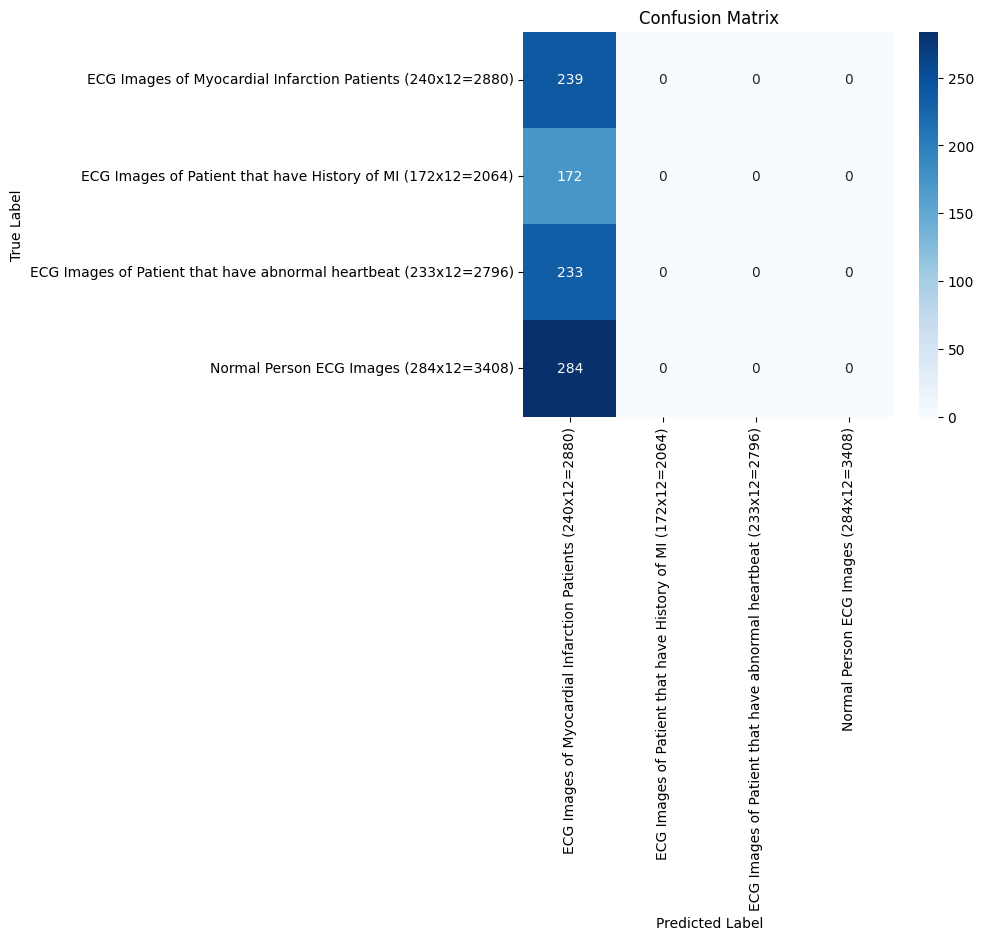

In [41]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_dataset.classes,
            yticklabels=test_dataset.classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

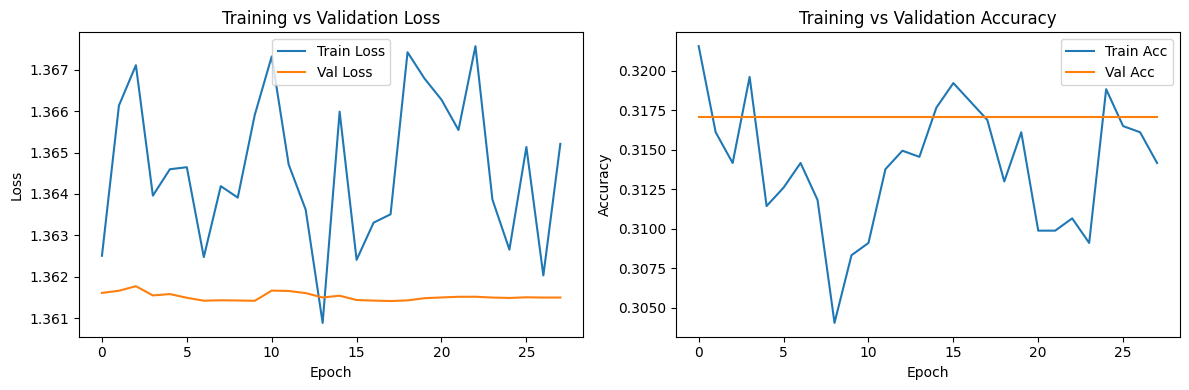

In [42]:
plt.figure(figsize=(12, 4))
# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label='Train Loss')
plt.plot(val_loss_history, label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(train_acc_history, label='Train Acc')
plt.plot(val_acc_history, label='Val Acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()

plt.tight_layout()
plt.show()